In [9]:
%load_ext autoreload
%autoreload 2
from napari import Viewer

viewer = Viewer()
from tseg.widgets import io_widget,cnn_widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
viewer.window.add_plugin_dock_widget("tseg", "Input/Output")

(<napari._qt.widgets.qt_viewer_dock_widget.QtViewerDockWidget at 0x2182db5ba30>,
 <tseg.widgets.io_widget.InputOutputWidget at 0x2182c850310>)

In [16]:
viewer.window.add_plugin_dock_widget("tseg", "CNN Detection")

(<napari._qt.widgets.qt_viewer_dock_widget.QtViewerDockWidget at 0x218070577f0>,
 <tseg.widgets.cnn_widget.CNNWidget at 0x2182c35b370>)

In [7]:
l1 = [layer for layer in viewer.layers if layer._type_string == "image"][0]

IndexError: list index out of range

In [22]:
import plantseg
from plantseg.core.zoo import ModelZoo

In [23]:
mz = ModelZoo(plantseg.PATH_MODEL_ZOO, plantseg.PATH_MODEL_ZOO_CUSTOM)

In [24]:
m1 = mz.get_model_names()[0]

models = mz.models
t = models["id"]

In [34]:
mz.get_bioimageio_zoo_all_model_names()
ff = mz.get_bioimageio_zoo_plantseg_model_names()[0]
ff[1]

'efficient-chipmunk'

In [35]:
mz.get_model_by_name(ff[1])

d:\miniforge3\envs\plant-seg\Lib\site-packages\plantseg\core\zoo.py:301: UserWarning: Model efficient-chipmunk not found in the models zoo configuration.
  warn(f"Model {model_name} not found in the models zoo configuration.")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Alireza Vaezi\\.plantseg_models\\efficient-chipmunk\\config_train.yml'

In [7]:
from pathlib import Path
from plantseg.tasks import import_image_task, unet_prediction_task

# input_path = Path(r"D:\toxo\Cole_002\Cole_002_TiffStack\002t01z04.tif")
input_path = Path(r"C:\Users\Alireza Vaezi\Desktop\The Big Projects\TOXO PARENT\Toxo Data\stacked\Stack01.tif")

In [9]:
plantseg_image = import_image_task(input_path=input_path, semantic_type="raw", stack_layout="ZYX")  # Specify the semantic type: 'raw', 'segmentation', or 'prediction'  # Specify the stack layout: '3D', '2D', or '2D_time'

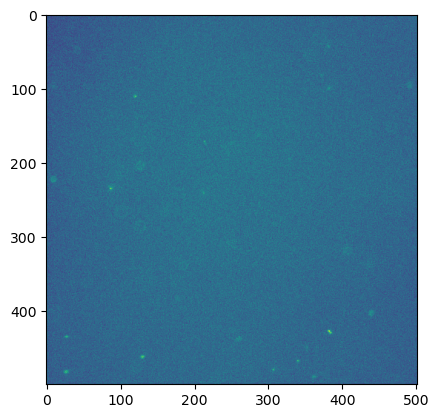

In [12]:
from matplotlib import pyplot as plt

plt.imshow(plantseg_image.get_data()[10])

In [17]:
from plantseg.tasks.segmentation_tasks import multicut

In [20]:
nn = multicut(plantseg_image, plantseg_image)

AttributeError: 'PlantSegImage' object has no attribute 'max'

In [10]:
mz.get_model_names()

['generic_confocal_3D_unet',
 'generic_light_sheet_3D_unet',
 'confocal_3D_unet_ovules_ds1x',
 'confocal_3D_unet_ovules_ds2x',
 'confocal_3D_unet_ovules_ds3x',
 'confocal_2D_unet_ovules_ds2x',
 'lightsheet_3D_unet_root_ds1x',
 'lightsheet_3D_unet_root_ds2x',
 'lightsheet_3D_unet_root_ds3x',
 'lightsheet_2D_unet_root_ds1x',
 'lightsheet_3D_unet_root_nuclei_ds1x',
 'lightsheet_2D_unet_root_nuclei_ds1x',
 'confocal_2D_unet_sa_meristem_cells',
 'confocal_3D_unet_sa_meristem_cells',
 'lightsheet_3D_unet_mouse_embryo_cells',
 'confocal_3D_unet_mouse_embryo_nuclei',
 'PlantSeg_3Dnuc_platinum']

INFO: P [MainThread] 2024-12-18 13:37:52,235 plantseg.functionals.prediction.prediction - Zoo prediction: Running model from PlantSeg official zoo.
INFO: P [MainThread] 2024-12-18 13:37:52,251 plantseg.utils - Downloading file config_train.yml from https://zenodo.org/record/7774537/files/config_train.yml...
INFO: P [MainThread] 2024-12-18 13:37:52,253 plantseg.utils - Downloading file best_checkpoint.pytorch from https://zenodo.org/record/7774537/files/unet2d-lateral-root-lightsheet.pytorch...
INFO: P [MainThread] 2024-12-18 13:38:01,095 plantseg.functionals.prediction.prediction - Computing theoretical minimum halo from model.
INFO: P [MainThread] 2024-12-18 13:38:01,096 plantseg.functionals.prediction.prediction - For raw in shape (500, 502): set patch shape (1, 64, 64), set halo shape (0, 44, 44)
INFO: P [MainThread] 2024-12-18 13:38:01,176 plantseg.functionals.prediction.utils.array_predictor - Using batch size of 1 for prediction


100%|██████████| 121/121 [00:00<00:00, 127.51it/s]


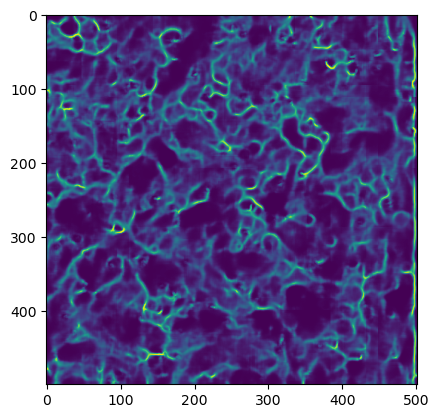

In [26]:
from plantseg.tasks import unet_prediction_task

predicted_images = unet_prediction_task(image=plantseg_image, model_name="lightsheet_2D_unet_root_ds1x", model_id=None, suffix="_prediction", patch=(1, 64, 64), device="cuda")  # Replace with the name of the model you wish to use  # Replace with the ID of the model you wish to use  # Suffix to append to the new image name  # Patch size for prediction; adjust as needed  # Specify 'cuda' for GPU or 'cpu' for CPU

plt.imshow(predicted_images[0].get_data())

In [1]:
import cellpose

In [1]:
from cellpose import models, utils, io
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:\toxo\Cole_002\Cole_002_TiffStack\002t01z10.tif"  # Replace with the path to your image
image = io.imread(image_path)

In [2]:
import cellpose.models


# Initialize a Cellpose model
model = models.Cellpose(True, model_type="cyto2")  # Use 'cyto' for cytoplasm, 'nuclei' for nuclei segmentation

d:\miniforge3\envs\plant-seg\Lib\site-packages\cellpose\resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, map_location=dev

In [3]:
# Run the segmentation model
masks, flows, styles, diams = model.eval(image, diameter=None, channels=[0, 0], flow_threshold=0.4, cellprob_threshold=0)  # Set None to let the model estimate the object size  # Grayscale: [0, 0]; for RGB, use [0, 1] (e.g., nuclear and cytoplasm)  # Adjust this parameter as needed  # Adjust this parameter as needed

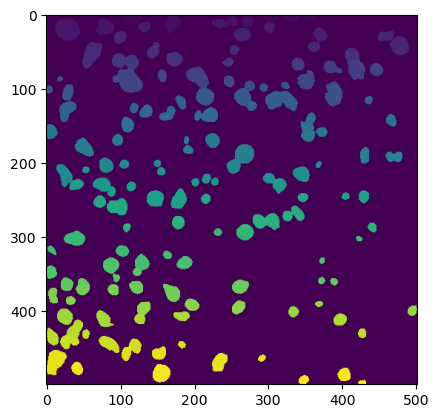

In [4]:
plt.imshow(masks)

In [ ]:
# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(utils.outlines_list(masks), cmap="viridis")  # Overlay segmentation outlines
ax[1].set_title("Segmented Image")
plt.show()

# Save the segmentation masks
output_path = "path/to/output/masks.tif"  # Replace with your desired output path
io.imsave(output_path, masks.astype("uint16"))  # Save as uint16 to preserve mask values

In [43]:
import cellpose.models

models.MODEL_NAMES

['cyto3',
 'nuclei',
 'cyto2_cp3',
 'tissuenet_cp3',
 'livecell_cp3',
 'yeast_PhC_cp3',
 'yeast_BF_cp3',
 'bact_phase_cp3',
 'bact_fluor_cp3',
 'deepbacs_cp3',
 'cyto2',
 'cyto',
 'CPx',
 'transformer_cp3',
 'neurips_cellpose_default',
 'neurips_cellpose_transformer',
 'neurips_grayscale_cyto2',
 'CP',
 'CPx',
 'TN1',
 'TN2',
 'TN3',
 'LC1',
 'LC2',
 'LC3',
 'LC4']

In [54]:
m = models.CellposeModel(model_type="CPx")

100%|██████████| 25.3M/25.3M [00:02<00:00, 10.2MB/s]
